In [38]:
import numpy as np
import pandas as pd

# creating a random dataframe

In [39]:
np.random.seed(23)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1,cov_mat1,20)

df = pd.DataFrame(class1_sample,columns = ["fet1","fet2","fet3"])
df["target"] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2,cov_mat2,20)

df1 = pd.DataFrame(class2_sample,columns = ["fet1","fet2","fet3"])
df1["target"] = 0

df = pd.concat([df, df1], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df = df.sample(40)

df.head()

,fet1,fet2,fet3,target
2,-0.045438,1.040886,-0.094035,1
34,-0.331617,-1.632386,0.619114,1
14,0.177061,-0.598109,1.226512,0
11,1.267248,0.173634,-1.223255,1
12,-0.022539,0.013422,0.935945,1


# 3D plot of dataFrame

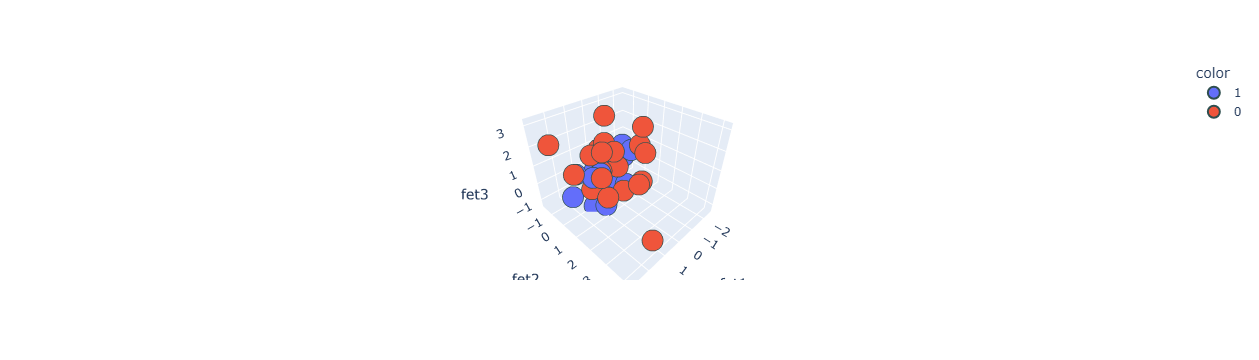

In [40]:
import plotly.express as px
fig = px.scatter_3d(df,x = df["fet1"],y = df["fet2"], z = df["fet3"],color = df["target"].astype("str"))
fig.update_traces(marker = dict(size = 12,line = dict(width = 2,color = "DarkSlateGrey")),selector = dict(mode = "markers"))
fig.show()

# Step1- apply scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [44]:
df.head()

,fet1,fet2,fet3,target
2,-0.419084,0.553723,-0.669580,1
34,-0.669383,-1.998011,-0.042684,1
14,-0.224481,-1.010757,0.491251,0
11,0.729022,-0.274101,-1.662224,1
12,-0.399056,-0.427028,0.235828,1


# Step2-find covarinance matrix

In [45]:
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print("covariance Matrix :\n",covariance_matrix)

covariance Matrix :
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


# Step3- finding eigen_value and eigen_vector

In [46]:
eigen_value,eigen_vectors = np.linalg.eig(covariance_matrix)


In [47]:
eigen_value

array([1.3536065 , 0.94557084, 0.77774573])

In [48]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

# 3D plot of eigenvectors of dataframe

In [49]:
%matplotlib inline

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# ---- FIXED Arrow3D class ----
class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxyz = (dx, dy, dz)

    def draw(self, renderer):
        x, y, z = self._xyz
        dx, dy, dz = self._dxyz

        xs, ys, zs = proj3d.proj_transform(
            [x, x + dx],
            [y, y + dy],
            [z, z + dz],
            self.axes.M
        )
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    # 🔑 THIS METHOD FIXES THE ERROR
    def do_3d_projection(self, renderer=None):
        x, y, z = self._xyz
        dx, dy, dz = self._dxyz

        xs, ys, zs = proj3d.proj_transform(
            [x, x + dx],
            [y, y + dy],
            [z, z + dz],
            self.axes.M
        )
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)


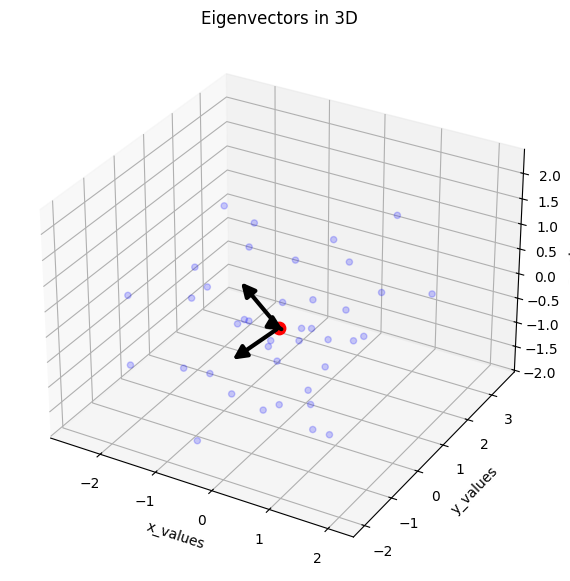

In [51]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['fet1'], df['fet2'], df['fet3'],
           color='blue', alpha=0.2)

mx, my, mz = df[['fet1','fet2','fet3']].mean()
ax.scatter(mx, my, mz, color='red', s=80)

for v in eigen_vectors.T:
    arrow = Arrow3D(mx, my, mz,
                    v[0], v[1], v[2],
                    mutation_scale=20,
                    lw=3,
                    arrowstyle="-|>",
                    color="black")
    ax.add_artist(arrow)

ax.set_xlabel("x_values")
ax.set_ylabel("y_values")
ax.set_zlabel("z_values")

plt.title("Eigenvectors in 3D")
plt.show()


# our top 2 extrext columns vectors pc1,pc2

In [55]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [56]:
transformed_df = np.dot(df.iloc[:, 0:3].values, pc.T)
new_df = pd.DataFrame(transformed_df, columns=["pc1", "pc2"])
new_df["target"] = df["target"].values
new_df.head()

,pc1,pc2,target
0,-0.478444,0.774372,1
1,1.726114,0.492511,1
2,1.056919,-0.212737,0
3,-0.997408,0.778938,1
4,0.623953,0.088371,1


# This is new Projection of new Dataframe pc1,pc2 and target 

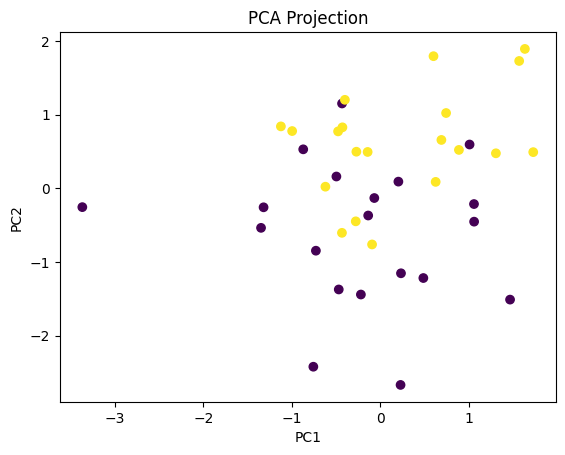

In [57]:
plt.scatter(new_df["pc1"], new_df["pc2"], c=new_df["target"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()
